<a href="https://colab.research.google.com/github/Roshanshres/netflix-data-analysis/blob/main/netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

# Data PreProcessing

In [159]:
df.head() #shows record of movies. By default it shows 5 rows.

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [160]:
#to check null value
df.info()
#no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [161]:
#convert data type. ie release date object into datetime



In [162]:
#to check only one column ie genre
df['Genre'].head() #only 5

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [163]:
# to check duplicate
df.duplicated().sum()

0

# statistics
statistics is used in numbers.

In [164]:
#check basic statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration Summary
* we have dataframe consisting of 9827 rows and columns.
* our dataset looks a bit tidy with no NaNs nor duplicated values.
* Release_Date column needs to be casted into date time and to extract only the year value.
* Overview , Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
* ther is noticable outliners in Popularity column.
* Vote_Average better be categorised for proper analysis.
* Genre column has comma sepatated values and white spaces that needs to be handled and casted into category. Exploration Summary.


In [165]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [166]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)
#datetime data type

datetime64[ns]


In [167]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [168]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the Columns

In [169]:
cols = ['Overview', 'Original_Language', 'Poster_Url']


In [170]:
df.drop(cols, axis=1, inplace = True) #remove permanently

In [171]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [172]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


#categorizing Vote_Average column
we would cut the vote_average vakues and make 4 categories Popular, average, below average, not_popular to describe it more using categorize_col() functions provided above.

In [173]:
def categorize_col(df, col, labels): #user function created

  edges = [df[col].describe()['min'],
          df[col].describe()['25%'],
          df[col].describe()['50%'],
          df[col].describe()['75%'],
          df[col].describe()['max']]


  df[col] = pd.cut(df[col], edges, labels = labels, duplicates= 'drop') #helps in categorized in labels
  return df

In [174]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [175]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [176]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


In [177]:
#blank hatauni
df.dropna(inplace= True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


# We'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [178]:
#df['Genre'] = df['Genre'].astype(str)
#df['Genre'].str.split(',')
df['Genre'] = df['Genre'].str.split(',')

df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [179]:
#casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 750.3+ KB


In [181]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,38


In [182]:
df['Genre'] = df['Genre'].str.split(', ').apply(lambda x: ', '.join(pd.unique(x)))


<ipython-input-182-65a8395e96cf>:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['Genre'] = df['Genre'].str.split(', ').apply(lambda x: ', '.join(pd.unique(x)))


In [183]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [184]:
df['Genre'] = df['Genre'].str.lower().str.strip()


In [185]:
df['Genre'] = df['Genre'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))


# Data Visualization


In [186]:
sns.set_style('whitegrid')

What is the most frequent genre of movies released on netflix?

In [187]:
df['Genre'].describe()

,Genre
count,25552
unique,19
top,drama
freq,3715


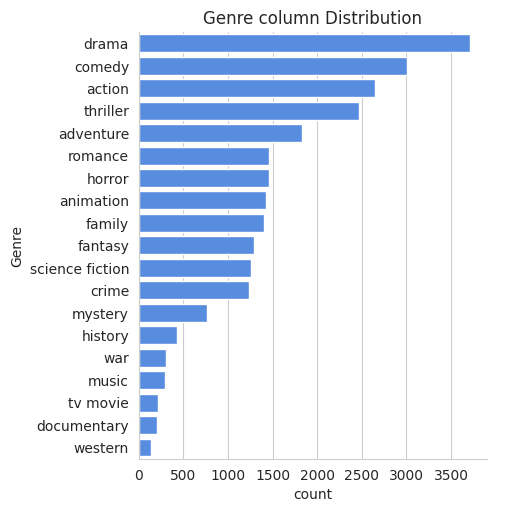

In [188]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order=df['Genre'].value_counts().index,
            color = '#4287f5')

plt.title('Genre column Distribution')
plt.show()


#Which has highest votes in the vote average column

In [189]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,science fiction
3,2022,The Batman,3827.658,1151,popular,crime
4,2022,The Batman,3827.658,1151,popular,mystery


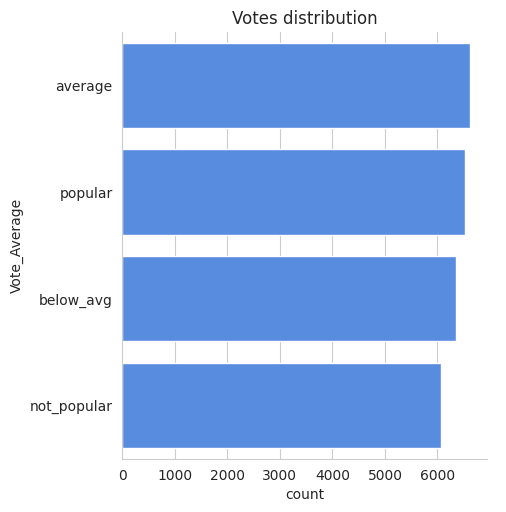

In [191]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')

plt.title('Votes distribution')
plt.show()

# what movie got the highest popularity? What is its genre?


In [192]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,science fiction
3,2022,The Batman,3827.658,1151,popular,crime
4,2022,The Batman,3827.658,1151,popular,mystery


In [193]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,science fiction


# what movie got the lowest popularity? What is its genre?


In [194]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,history
25549,1984,Threads,13.354,186,popular,war
25550,1984,Threads,13.354,186,popular,drama
25551,1984,Threads,13.354,186,popular,science fiction


#Which year has the most filmed movies?

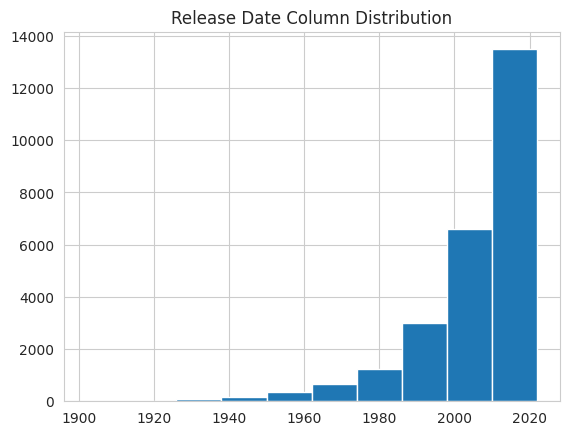

In [196]:
df['Release_Date'].hist()
plt.title("Release Date Column Distribution")
plt.show()

**Conclusion**
1. What is the most frequent genre in the dataset?

 Drama is the most frequnt genre in our dataset and has appered more then 14% of the times among 19 other genres.

2. What genres has highest votes?
* we have 25.5% of our dataseet with popular vites (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

3. What movie got he highest popularity>? What is its genre?
  Spider -Man No way Home comning, action, adventure and sci-Fiction

4. What movie got he lowest popularity>? What is its genre?
  The united states , threads. music drama, warm sci-fi, and history.

5. Which year has the most filmed movie?
   2020 ha the highest fikming rate in our dataset.

